# LPO Measure - Data Exploration

## Load data

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

SQLITE_PATH = "dev-measurements.db"

In [2]:
conn = sqlite3.connect(SQLITE_PATH)

df_runs = pd.read_sql_query("SELECT id, clay_commit_sha FROM runs", conn)
df_measurements = pd.read_sql_query("SELECT run_id, score, reason, case_id FROM measurements", conn)
df_cases = pd.read_sql_query("SELECT id, instruction FROM cases", conn)

conn.close()

print("df_runs head:")
display(df_runs.head())
print("\ndf_measurements head:")
display(df_measurements.head())
print("\ndf_cases head:")
display(df_cases.head())

df_runs head:


,id,clay_commit_sha
0,1,DEV
1,2,DEV



df_measurements head:


,run_id,score,reason,case_id
0,1,3,A browser node is present and loaded to https:...,3
1,1,3,A single function node was created to add two ...,1
2,1,3,A single text node with a proper three-line ha...,5
3,1,2,Two appropriate function nodes (DoubleExp and ...,2
4,1,3,"There are exactly five text nodes, each dedica...",4



df_cases head:


,id,instruction
0,1,Create a function node to add two numbers.
1,2,Express 2*exp(x)-y as a graph of function node...
2,3,Open BBC news.
3,4,Give me a list of the top 5 rennaisance painte...
4,5,"Put a haiku at 1000, 1000."


## Plots and analysis

In [5]:
df_merged = pd.merge(df_measurements, df_runs, left_on="run_id", right_on="id")
df_agg = df_merged.groupby("clay_commit_sha")["score"].mean().reset_index()

df_agg

,clay_commit_sha,score
0,DEV,2.4375


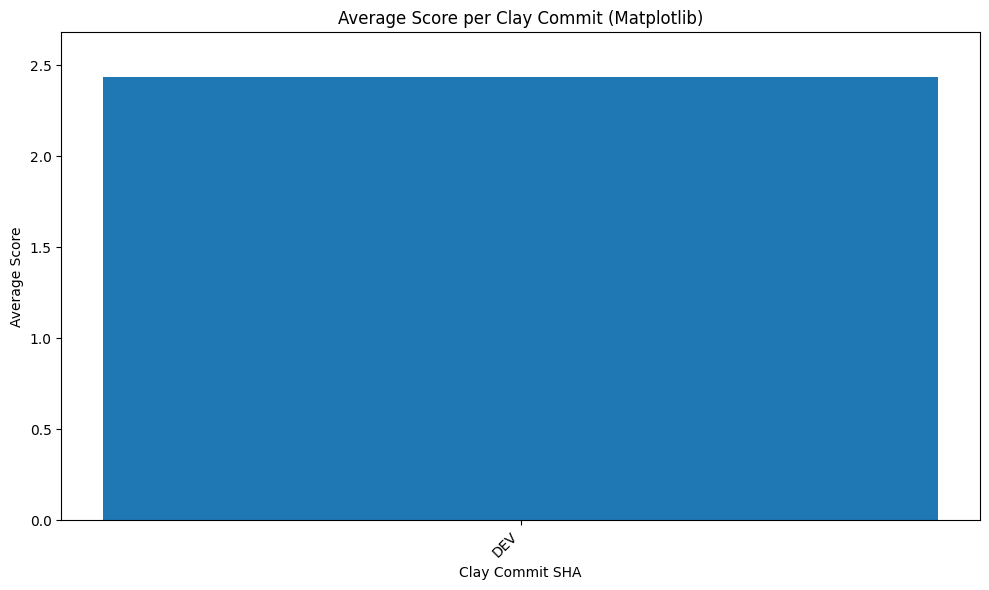

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(df_agg["clay_commit_sha"], df_agg["score"])
plt.xlabel("Clay Commit SHA")
plt.ylabel("Average Score")
plt.title("Average Score per Clay Commit (Matplotlib)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, df_agg['score'].max() * 1.1)
plt.tight_layout()
plt.show()

## 6. Explore a Single Case

In [20]:
def get_case_measurements(instruction:str|None=None, case_id: int|None = None):
    assert (instruction is not None) + (case_id is not None) > 0, "Need either instruction or case_id"

    if case_id is None:
        case_id = df_cases[df_cases["instruction"] == instruction]["id"].iloc[0]

    return df_measurements.query("case_id == @case_id").drop("case_id", axis=1)


pprint(df_cases.instruction.unique().tolist())
get_case_measurements(case_id=7)

['Create a function node to add two numbers.',
 'Express 2*exp(x)-y as a graph of function nodes. You should use two function '
 'nodes. Evaluate the graph with inputs x=0 and y=1, and write the output to a '
 'text node.',
 'Open BBC news.',
 'Give me a list of the top 5 rennaisance painters and the list of their top '
 'artworks. One node per artist.',
 'Put a haiku at 1000, 1000.',
 'Get the current temperature for Tallinn using the OpenMeteo API.',
 'New canvas.',
 'Put things about the sumerian language on the canvas.']


,run_id,score,reason
5,1,1,The instruction implies creating/opening a bra...
13,2,1,"The instruction asked for a new canvas, which ..."
